### 단축키
* SHIFT + ENTER : 현재 셀 실행하고 다음 셀로 내려가기
* CTRL + ENTER : 현재 셀을 실행하고 현재 위치 머무르기
* ESC + X : 셀삭제
* ESC + A : 위의 셀 추가
* ESC + B : 아래 셀 추가
* ESC + M : 설명
* ESC + Y : 코드 입력
* ESC + L : 번호

## BeutifulSoup

### parser 종류
* lxml
* html5lib
* html.parser

### 하나의 요소, 여러개의 요소 가져오기
* soup.find(), soup.find_all()

In [ ]:
from bs4 import BeautifulSoup

html = """
<html>
<head><title> test site </title></head>
<p class='class1' align="left">test3</p>
<p class='class1'>test2</p>
<p id='p1'>오늘의 주가지수 1500</p>
<span class='class3'>span tag text</span>
<p class='class4'>test3</p>
</html>
"""

soup = BeautifulSoup(html, 'lxml')

### <p id='p1'>오늘의 주가지수 1500</p> 가져오기

In [ ]:
soup.find("p"), soup.p

### <p class='class1'>test2</p> 가져오기

In [ ]:
soup.find_all("p")[1]

In [3]:
from bs4 import BeautifulSoup

html = '''
<html>
<head><title>나의 홈페이지</title>
</head><body>
안녕하세요
<div>
<a class='url' href="https://www.naver.com/">naver</a>
<a class='url' href="https://www.google.com/">google</a>
<p> 내가 가장 좋아하는 동물은 강아지입니다.</p>
<p> 나는 그리고 네이버 홈페이지에 자주 갑니다.</p>
<p class="p3"> 강아지 사진과 네이버 링크 p3 그룹 1</p>
<p class="p3"> 강아지 사진과 네이버 링크 p3 그룹 2</p>
<p id="p4_only"> 강아지 사진과 네이버 ID p4 </p>
<pre>
 내가 가장 좋아하는 동물은 강아지입니다.
 나는 그리고 네이버 홈페이지에 자주 갑니다.
 </pre>
</div>
<div>
<p class="p3"> 강아지 사진과 네이버 링크 p3 그룹 3</p>
<p class="p3"> 강아지 사진과 네이버 링크 p3 그룹 4</p>
<p id="p5_only"> 강아지 사진과 네이버 ID p4 </p>
</div>
</body>
</html>
'''

soup = BeautifulSoup(html, 'lxml')

In [4]:
soup.find("a", class_="url")["href"]

'https://www.naver.com/'

In [6]:
a = soup.find_all("a", class_="url")
for one in a:
    print(one["href"])

https://www.naver.com/
https://www.google.com/


In [7]:
soup.find_all("p", class_="p3")[2:]

[<p class="p3"> 강아지 사진과 네이버 링크 p3 그룹 3</p>,
 <p class="p3"> 강아지 사진과 네이버 링크 p3 그룹 4</p>]

In [12]:
list(soup.div.children)[5]

<p> 내가 가장 좋아하는 동물은 강아지입니다.</p>

In [1]:
from bs4 import BeautifulSoup
html = """
<html>
<head><title> test site </title></head>
<p class='class1' align="left">test3</p>
<p class='class1'>test2</p>
<p id='p1'>오늘의 주가지수 1500</p>
<span class='class3'>span tag text</span>
<p class='class4'>test3</p>
</html>
"""

In [2]:
soup = BeautifulSoup(html, 'lxml')
soup.title

<title> test site </title>

## 보기 좋게 태그 정리(prettify())

In [4]:
print(soup.prettify())

<html>
 <head>
  <title>
   test site
  </title>
 </head>
 <body>
  <p align="left" class="class1">
   test3
  </p>
  <p class="class1">
   test2
  </p>
  <p id="p1">
   오늘의 주가지수 1500
  </p>
  <span class="class3">
   span tag text
  </span>
  <p class="class4">
   test3
  </p>
 </body>
</html>



In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [4]:
# url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after'
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page="
# 2page 
# 3page

In [5]:
url1 = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1"
page = urlopen(url1)
soup = BeautifulSoup(page, "html.parser")
comment_all = soup.find_all('td', class_='title')
comment_all

[<td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.naver?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>
 <br/>이걸 왜 지금 봤을까.. 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('wirl****', 'oIL+HXWo3mkFnetb58ejqEY+lo4CGhjRVrFc6Z7pHjw=', '이걸 왜 지금 봤을까..', '17688674', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
 </td>,
 <td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.naver?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:90%">별점 - 총 10점 중</span></span><em>9</em>
 </div>
 <br/>보는 내내 눈이 즐거웠던 교훈 주는 만화영화 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('dudx****', 'MH/hVCiqOjGavwKtmsoNHZEvMQtKs1VeT7150BQkbu0=', '보는 내내 눈이 즐거웠던 교훈 주는 만화영화', '17686018', 'point_after');" style="color:#8F8

In [6]:
print(len( comment_all ))

10


In [7]:
temp = list(comment_all[5].children)
temp[6]

'소니 최고의 애니메이션 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t'

In [8]:
result = temp[6].strip()
result

'소니 최고의 애니메이션'

# 여러개의 커멘트 가져오기

In [9]:
cnt = 0
comments = []
for comment in comment_all:
    temp= list(comment.children)
    if len(temp) < 5:
        cnt= cnt + 1
        continue
    else:
        try:
            cnt= cnt + 1
            result = temp[6].strip()
            comments.append(result)
        except:
            print("error cnt count", cnt)
comments

['이걸 왜 지금 봤을까..',
 '보는 내내 눈이 즐거웠던 교훈 주는 만화영화',
 '진짜 화려하고 쭉 몰입해서 본영화',
 '애니메이션이라는 틀을 깨버리는 스탠 리의 자식들',
 '정말 재밌다는 소문만 듣다가 이제서야 봄. 만화적 연출을 위한 저 프레임 연출은 호불호가 좀 갈린부분 아닐까, 나또한 저 부분이 그렇게 와닿게 만화적이게 보이게 했는지는 모르겠다 그냥 부드럽게 보는게 더 보기 편하지 않았을까, 그 외에 만화적 표현들은 연출적으로 아주 훌륭했다. BGM : 중간 중간 깔리는 음악들은 아주 훌륭했다. 연출과 아주 찰떡궁합. 스토리는 좀 진부했다 아주 무난하고 평범한 히어로물 주인공의 위기와 성장 살짝 개연성이 아쉬운 부분이 있었으나 감안하고 보기엔 마무리 포장까지 완성도가 높았다. 개인적 총평은. 아주 재밌었던 영화라기 보단 아주 잘 만든 영화에 가까웠다.',
 '소니 최고의 애니메이션',
 '최고다.',
 '최고의 스파이더맨 영화, 그냥 믿는거야!',
 '스파이더맨 영화중 가히 최고',
 '완벽하다 너무 재밌다 진짜 잘 만든 영화']

In [10]:
comments = [ ]
cnt = 0
for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")

    comment_all = soup.find_all('td', class_='title')
    for comment in comment_all:
        temp= list(comment.children)
        if len(temp) < 5:
            cnt= cnt + 1
            print("len<5 case :",cnt)
            continue
        else:
            try:
                cnt= cnt + 1
                result = temp[6].strip()
                comments.append(result)
            except:
                cnt= cnt + 1
                print("len>=5 case ",cnt)
                print(temp)
print(len(comments))
print(comments)
print(cnt)

70
['이걸 왜 지금 봤을까..', '보는 내내 눈이 즐거웠던 교훈 주는 만화영화', '진짜 화려하고 쭉 몰입해서 본영화', '애니메이션이라는 틀을 깨버리는 스탠 리의 자식들', '정말 재밌다는 소문만 듣다가 이제서야 봄. 만화적 연출을 위한 저 프레임 연출은 호불호가 좀 갈린부분 아닐까, 나또한 저 부분이 그렇게 와닿게 만화적이게 보이게 했는지는 모르겠다 그냥 부드럽게 보는게 더 보기 편하지 않았을까, 그 외에 만화적 표현들은 연출적으로 아주 훌륭했다. BGM : 중간 중간 깔리는 음악들은 아주 훌륭했다. 연출과 아주 찰떡궁합. 스토리는 좀 진부했다 아주 무난하고 평범한 히어로물 주인공의 위기와 성장 살짝 개연성이 아쉬운 부분이 있었으나 감안하고 보기엔 마무리 포장까지 완성도가 높았다. 개인적 총평은. 아주 재밌었던 영화라기 보단 아주 잘 만든 영화에 가까웠다.', '소니 최고의 애니메이션', '최고다.', '최고의 스파이더맨 영화, 그냥 믿는거야!', '스파이더맨 영화중 가히 최고', '완벽하다 너무 재밌다 진짜 잘 만든 영화', '', '극장에서 봤을때의 감동을 아직도 잊지못함 개인적으로 재개봉했으면 좋겠다', '영상미, 음악, 스토리 뭐하나 빠지는게 없네', '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?', '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ', '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!', '이게 진짜 현대예술이지', 

In [11]:
import pandas as pd

In [12]:
dict_doc = {"text" : comments}
doc = pd.DataFrame(dict_doc)

In [13]:
doc.to_csv("스파이더맨리뷰.csv", index = False)

### 댓글을 wordcloud로 시각화 하기

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [16]:
f = open("스파이더맨리뷰.csv", encoding="utf-8")
#f = open("SpiderMan.txt", 'r', encoding='utf-8')
text = f.read()
f.close()

In [17]:
from matplotlib import rc
rc('font', family='NanumGothic')

(-0.5, 399.5, 199.5, -0.5)

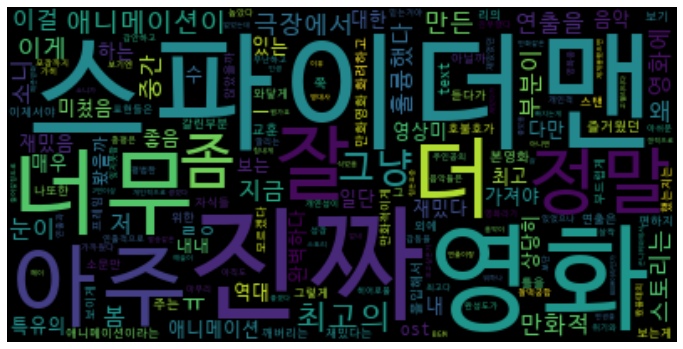

In [18]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('D2Coding.ttf', max_words=1000, relative_scaling = 0.2).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [19]:
import os
os.getcwd()

'D:\\Data\\문서\\GitHub\\LikeLion_13th_DataCourse\\codeclass\\2021.09.10'